<h1 style="margin-bottom: 50px;"><b> BooLEVARD Tutorials</b></h1>
<h5 style="margin-bottom: 2px; margin-top: 0px;">
    <b><span style="color: green;">[Tutorial 3]</span> <span>Activatory perturbations of p63, p53, and miR34 dampen cancer invasiveness.</b></span>
</h5>
<p>

In this tutorial, we will use a Boolean model representing key molecular cascades in **cancer metastasis**. The tutorial showcases how activatory perturbations of two tumor suppressor (p53 and p63) and micro RNA 34 successfully dampen invasiveness and increases apoptotic cell-fate decisions. This model is available in [Cell Collective](https://research.cellcollective.org/dashboard#module/5884:1) (SBML) and [GinSIM's model repository](http://ginsim.org/node/191) (ZGINML). This model was used as a showcase in the BooLEVARD's paper, for which a BoolNet version was generated, and therefore, we will use that version. To know how to convert Boolean models in SBML format to BoolNet format, please refer to [Tutorial 2](https://github.com/farinasm/boolevard/blob/main/tutorials/Guard_Cell_Abscisic_Acid.ipynb).

</p>

</p> <p style="font-size:90%; color:gray;"> Cohen DPA, Martignetti L, Robine S, Barillot E, Zinovyev A, et al. (2015). <i>Mathematical Modelling of Molecular Pathways Enabling Tumour Cell Invasion and Migration.</i> PLOS Computational Biology 11(11): e1004571. <a href="https://doi.org/10.1371/journal.pcbi.1004571" target="_blank">https://doi.org/10.1371/journal.pcbi.1004571</a> </p>

In [1]:
import boolevard as blv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/marco/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


/home/marco/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


We will load the model and set up the ***Apoptosis*** and ***Invasion*** phenotype nodes as read outs. In addition, we will define a set of perturbations to perform (**inhibition** of ***AKT1*** and ***AKT2***, and **activation** of ***p53***), in order to study their inpact in the apoptotic and invasive fates. Let's first load the model and retrieve some basic information:

In [37]:
model = blv.Load("resources/Cohen_2015.bnet") # Load the model (BoolNet format)
model.Info.columns = list(range(len(model.Info.columns)-2)) + ["DNF", "NDNF"] # Let's reset the stable states so that they start from 0
phenotypes = ["Apoptosis", "Invasion"] # Set node(s) to check
perturbations = ["p63%ACT", "p53%ACT", "miR34%ACT"] # Set list of perturbations to apply
print(f"Number of nodes: {len(model.Nodes)}")
print(f"Number of inputs: {len(model.Info.index[model.Info.index == model.Info['DNF'].apply(str)])}, ({', '.join(list((model.Info.index[model.Info.index == model.Info['DNF'].apply(str)])))})")
print(f"Number of stable states: {len(model.Info.columns)-2}")

Number of nodes: 33
Number of inputs: 2, (ECMicroenv, DNAdamage)
Number of stable states: 9


In [38]:
model.Info

,0,1,2,3,4,5,6,7,8,DNF,NDNF
TGFbeta_e,0,0,0,0,0,1,1,1,1,ECMicroenv,~ECMicroenv
TGFbeta_i,0,0,0,0,0,0,0,1,1,"And(~CTNNB1, NICD)","Or(CTNNB1, ~NICD)"
TGFbeta,0,0,0,0,0,1,1,1,1,"Or(TGFbeta_e, TGFbeta_i)","And(~TGFbeta_e, ~TGFbeta_i)"
ECMicroenv,0,0,0,0,0,1,1,1,1,ECMicroenv,~ECMicroenv
GF,0,0,0,1,1,0,0,1,1,"Or(And(~CDH1, CDH2), And(~CDH1, GF))","Or(CDH1, And(~CDH2, ~GF))"
CDH1,1,1,1,0,0,1,1,0,0,"And(~AKT2, ~SNAI1, ~SNAI2, ~TWIST1, ~ZEB1, ~ZEB2)","Or(AKT2, SNAI1, SNAI2, TWIST1, ZEB1, ZEB2)"
ERK,0,0,0,1,1,0,0,1,1,"Or(And(~AKT1, CDH2), And(~AKT1, GF), And(~AKT1...","Or(AKT1, And(~CDH2, ~GF, ~NICD, ~SMAD))"
EMT,0,0,0,1,1,0,0,1,1,"And(~CDH1, CDH2)","Or(CDH1, ~CDH2)"
CDH2,0,0,0,1,1,0,0,1,1,TWIST1,~TWIST1
VIM,0,0,0,1,1,0,0,1,1,"Or(CTNNB1, ZEB2)","And(~CTNNB1, ~ZEB2)"


The model reaches a total of 9 stable states upon any combination of the local states *ECMicroenv* and *DNAdamage* input nodes. We can observe that *Apoptosis* is active in 4 states (1, 2, 5, 6), whereas *Invasion* is active in two (7, 8).
- Apoptosis: reached upon *DNAdamage*, *DNAdamage* and *ECMicroenv*.
- Invasion: reached upon *ECMicroenv*, *DNAdamage* and *ECMicroenv*.

Let's now count the paths toward these phenotype nodes across every stable state:

In [4]:
paths = model.CountPaths(phenotypes, ss_wise = True) # Count the number of paths leading to the Apoptosis and Invasion nodes

Evaluating Stable State: 0
Apoptosis: -355, 1.0629494984944662e-05 minutes.
Invasion: -96, 2.3802121480305988e-06 minutes.
Evaluating Stable State: 1
Apoptosis: 650803, 0.03362019062042236 minutes.
Invasion: -79488, 0.004182140032450358 minutes.
Evaluating Stable State: 2
Apoptosis: 547393, 0.031016747156778973 minutes.
Invasion: -137450, 0.007069091002146403 minutes.
Evaluating Stable State: 3
Apoptosis: -92533, 0.005101394653320312 minutes.
Invasion: -2867, 0.0001383662223815918 minutes.
Evaluating Stable State: 4
Apoptosis: -2371, 0.0008930842081705729 minutes.
Invasion: -213, 4.831155141194661e-05 minutes.
Evaluating Stable State: 5
Apoptosis: 69198, 0.007056013743082682 minutes.
Invasion: -7297, 0.0008472879727681478 minutes.
Evaluating Stable State: 6
Apoptosis: 47620, 0.008798758188883463 minutes.
Invasion: -10026, 0.001911294460296631 minutes.
Evaluating Stable State: 7
Apoptosis: -4106274, 0.27379823525746666 minutes.
Invasion: 554895, 0.04231379429499308 minutes.
Evaluating S

In [39]:
paths_sum = pd.DataFrame(paths)
paths_sum.columns = phenotypes
paths_sum

,Apoptosis,Invasion
0,-355,-96
1,650803,-79488
2,547393,-137450
3,-92533,-2867
4,-2371,-213
5,69198,-7297
6,47620,-10026
7,-4106274,554895
8,-1376996,179328


We observe that stable states triggering Apoptosis can be divided into two groups based on the number of paths activating this phenotype:
- **Higher Apoptosis (HiA):** stable state **1** (*DNAdamage*: ON, *ECMicroenv*: OFF) and stable state **2** (*DNAdamage*: ON, *ECMicroenv*: OFF)
- **Lower Apoptosis (LoA):** stable state **5** (*DNAdamage*: ON, *ECMicroenv*: ON) and stable state **6** (*DNAdamage*: ON, *ECMicroenv*: ON)

The HiA states have around 10 times more paths inhibiting apoptosis than the LoA ones.

Regarding the stable states triggering Invasion, we have one with around 3 times more paths than the other:
- **Higher Invasion (HiI):** stable state **7** (*DNAdamage*: OFF, *ECMicroenv*: ON)
- **Lower Invasion (LoI):** stable state **8** (*DNAdamage*: ON, *ECMicroenv*: ON)

We observe that ***DNAdamage* negatively impacts the *ECMicroenv*-triggered invassive fate**, and that ***ECMicroenv* negatively impacts the *DNAdamage*-triggered apoptotic fate**.

Let's now perform the perturbations and count the paths triggering the states of this phenotype nodes:

In [43]:
pert_models = {
    "Unperturbed": model,
    "p63a": model.Pert(perturbations[0]),
    "p53a": model.Pert(perturbations[1]),
    "miR34a": model.Pert(perturbations[2])
}

pert_paths = {}
for key in pert_models:
    pert_models[key].Info.columns = list(range(len(pert_models[key].Info.columns)-2)) + ["DNF", "NDNF"]
    pert_models[key].Info = pert_models[key].Info.loc[:, ~((pert_models[key].Info.loc["ECMicroenv"] == 0) & (pert_models[key].Info.loc["DNAdamage"] == 0))]
    pert_paths[key] = pd.DataFrame(pert_models[key].CountPaths(phenotypes, ss_wise=True))
    pert_paths[key].columns = phenotypes
    pert_paths[key].index = pert_models[key].Info.columns[:-2]


Evaluating Stable State: 1
Apoptosis: 650803, 0.03550153175989787 minutes.
Invasion: -79488, 0.004427965482076009 minutes.
Evaluating Stable State: 2
Apoptosis: 547393, 0.031353513399759926 minutes.
Invasion: -137450, 0.007886393864949545 minutes.
Evaluating Stable State: 4
Apoptosis: -2371, 0.0009159564971923829 minutes.
Invasion: -213, 4.942417144775391e-05 minutes.
Evaluating Stable State: 5
Apoptosis: 69198, 0.007487761974334717 minutes.
Invasion: -7297, 0.0009128570556640625 minutes.
Evaluating Stable State: 6
Apoptosis: 47620, 0.009185870488484701 minutes.
Invasion: -10026, 0.002027567227681478 minutes.
Evaluating Stable State: 7
Apoptosis: -4106274, 0.29480555057525637 minutes.
Invasion: 554895, 0.04455423355102539 minutes.
Evaluating Stable State: 8
Apoptosis: -1376996, 0.18616377115249633 minutes.
Invasion: 179328, 0.026827104886372886 minutes.
Evaluating Stable State: 1
Apoptosis: 726108, 0.03727216323216756 minutes.
Invasion: -85524, 0.004598780473073324 minutes.
Evaluating 

Now that we have counted the paths toward *Apoptosis* and *Invasion* phenotype nodes for the three perturbations, let's plot the results:

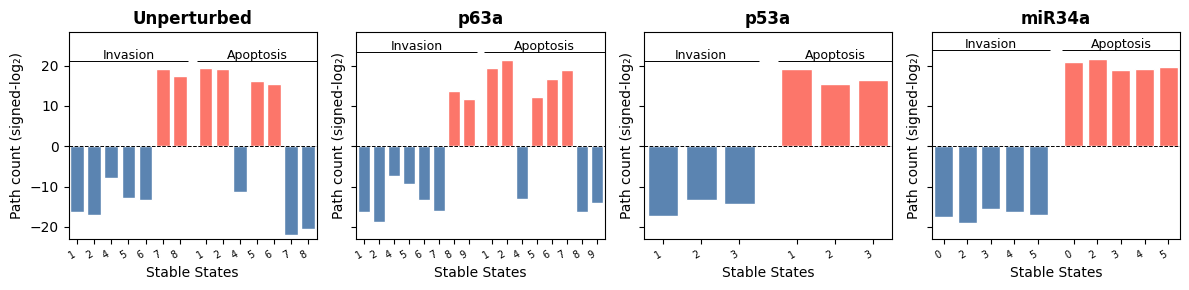

In [45]:
# Define a function to generate a bar plot with BooLEVARD's results for the stable states
def SSbars(data, sizex = 3, sizey = 2.5, labs = ("Invasion", "Apoptosis"), ax = None):
    def log_signed(x, base = 2):
        return np.sign(x) * np.log1p(np.abs(x))/np.log(base)
    states = data.index.astype(str).tolist()
    inv = log_signed(data["Invasion"].values, base = 2)
    apo = log_signed(data["Apoptosis"].values, base = 2)
    n = len(states)
    x_inv = np.arange(n)
    x_apo = x_inv + n + 0.5
    def col(v): return "#FC766A" if v > 0 else "#5B84B1"
    cols_inv = [col(v) for v in inv]
    cols_apo = [col(v) for v in apo]
    if ax is None:
        fig, ax = plt.subplots(figsize = (sizex, sizey))
    ax.bar(x_inv, inv, color = cols_inv, edgecolor = "white")
    ax.bar(x_apo, apo, color = cols_apo, edgecolor = "white")
    ax.axhline(0, color = "black", linestyle = "--", linewidth = 0.7)
    y_max = max(inv.max(), apo.max())
    y_min = min(inv.min(), apo.min())
    sep = y_max * 1.1
    ax.hlines(sep, x_inv[0]-0.5, x_inv[-1]+0.5, color = "black", linewidth = 0.7); ax.hlines(sep, x_apo[0]-0.5, x_apo[-1]+0.5, color = "black", linewidth = 0.7)
    ax.set_xticks(list(x_inv) + list(x_apo))
    ax.set_xticklabels(states*2, rotation = 30, ha = "right", fontsize = 7)
    ax.set_xlim(-0.5, x_apo[-1]+0.5); ax.set_ylim(y_min*1.2, y_max*1.3)
    ax.text((x_inv[0]+x_inv[-1])/2, sep*1.02, labs[0], ha="center", fontsize=9)
    ax.text((x_apo[0]+x_apo[-1])/2, sep*1.02, labs[1], ha="center", fontsize=9)
    title = getattr(data, "name", "")
    ax.set_title(title, fontweight = "bold", fontsize = 12)
    ax.set_ylabel("Path count (signed-log₂)", fontsize = 10); ax.set_xlabel("Stable States")
    plt.tight_layout()
    return ax

# Plot the results
fig, ax = plt.subplots(1, 4, figsize = (12, 3), sharey = True)
for ax, key in zip(ax, ["Unperturbed", "p63a", "p53a", "miR34a"]):
    df = pert_paths[key]
    df.name = key
    SSbars(df, sizex = 3, sizey = 3, labs = ("Invasion", "Apoptosis"), ax = ax)
plt.show()

<div style="font-size:90%;">
    <b>Figure 1: </b>Barplots showing the signed-log-scaled path count score leading to the local states of Invasion and Apoptosis phenotype nodes. Each plot represents a perturbation, and bars delimited by Invasion  and Apoptosis show the path count scores resulting in the inactivation (blue) or activation (red) of the Invasion and Apoptosis phenotype nodes.
</div>

<br>

**p63 activatory perturbation**

We can observe that upon activatory perturbation of *p63*, the local states of *Invasion* and *Apoptosis* are identical as in the perturbed configuration, except for an extra stable state. We still observe that there are two invasive stable states, but the paths leading to *Invasion* activation are substantially reduced upon *p63* activatory perturbation:

In [47]:
sum_upt = pd.concat([pert_models["Unperturbed"].Info.loc[["ECMicroenv", "DNAdamage"], ~pert_models["Unperturbed"].Info.columns.isin(["DNF", "NDNF"])],pert_paths["Unperturbed"].T]); sum_upt.columns.name = "Unperturbed"
sum_p63a = pd.concat([pert_models["p63a"].Info.loc[["ECMicroenv", "DNAdamage"], ~pert_models["p63a"].Info.columns.isin(["DNF", "NDNF"])],pert_paths["p63a"].T]); sum_p63a.columns.name = "p63a"
display(sum_upt); sum_p63a

Unperturbed,1,2,4,5,6,7,8
ECMicroenv,0,0,0,1,1,1,1
DNAdamage,1,1,1,1,1,0,1
Apoptosis,650803,547393,-2371,69198,47620,-4106274,-1376996
Invasion,-79488,-137450,-213,-7297,-10026,554895,179328


p63a,1,2,4,5,6,7,8,9
ECMicroenv,0,0,0,1,1,1,1,1
DNAdamage,1,1,1,0,1,1,0,1
Apoptosis,726108,2597481,-8087,4519,98526,505441,-76913,-16942
Invasion,-85524,-418316,-157,-696,-9770,-70079,13556,3336


- The high apoptosis (HiA) states (**1** and **2**) from the *Unperturbed* model correspond to stable states **1** and **2** in the *p63a* model. These show an overall **increase in apoptotic signaling** under the *p63a* perturbation.

- The low apoptosis (LoA) states (**5** and **6**) from the *Unperturbed* model match stable states **6** and **7** in the *p63a* model. These states also exhibit an **elevated apoptotic response** following *p63a* perturbation.

- The high and low invasion (HiI and LoI) states (**7** and **8**, respectively) in the *Unperturbed* model correspond to stable states **8** and **9** in the *p63a* model. In this case, a **marked reduction in invasive potential** is observed under *p63a* conditions.

<br>

**p53 activatory perturbation**

In this case, activatory perturbation of *p53* blocked the reachability of any invasive states:

In [49]:
sum_p53a = pd.concat([pert_models["p53a"].Info.loc[["ECMicroenv", "DNAdamage"], ~pert_models["p53a"].Info.columns.isin(["DNF", "NDNF"])],pert_paths["p53a"].T]); sum_p53a.columns.name = "p53a"
display(sum_upt); sum_p53a

Unperturbed,1,2,4,5,6,7,8
ECMicroenv,0,0,0,1,1,1,1
DNAdamage,1,1,1,1,1,0,1
Apoptosis,650803,547393,-2371,69198,47620,-4106274,-1376996
Invasion,-79488,-137450,-213,-7297,-10026,554895,179328


p53a,1,2,3
ECMicroenv,0,1,1
DNAdamage,1,0,1
Apoptosis,640545,47620,95238
Invasion,-153171,-10026,-20052


- The high apoptosis (HiA) states (**1** and **2**) in the *Unperturbed* model converge into a single stable state (**1**) in the *p53a* model, preserving a similar apoptotic profile.

- The low apoptosis (LoA) states (**5** and **6**) and the high invasion (HiI) state **8** from the *Unperturbed* model merge into a unified pro-apoptotic and anti-invasive state (**3**) in the *p53a* model, exhibiting both increased apoptosis and reduced invasion compared to their original forms.

- The remaining LoI state (**7**) transitions into stable state **2** in the *p53a* model, also showing a shift toward **higher apoptosis and reduced invasive capacity**.

<br>

**miR34 activatory perturbation**

In this case, we can see a similar trend as in the *p53a*, with overall even higher apoptosis and lower invasion:

In [50]:
sum_miR34a = pd.concat([pert_models["miR34a"].Info.loc[["ECMicroenv", "DNAdamage"], ~pert_models["miR34a"].Info.columns.isin(["DNF", "NDNF"])],pert_paths["miR34a"].T]); sum_p53a.columns.name = "miR34a"
display(sum_upt); sum_miR34a

Unperturbed,1,2,4,5,6,7,8
ECMicroenv,0,0,0,1,1,1,1
DNAdamage,1,1,1,1,1,0,1
Apoptosis,650803,547393,-2371,69198,47620,-4106274,-1376996
Invasion,-79488,-137450,-213,-7297,-10026,554895,179328


,0,2,3,4,5
ECMicroenv,0,0,1,1,1
DNAdamage,1,1,1,0,1
Apoptosis,1998981,3493902,497384,544103,895925
Invasion,-194425,-577853,-45067,-82159,-137210


- The high apoptosis (HiA) states (**1** and **2**) in the *Unperturbed* model are equivalent to stable states **0** and **2** in the *p63a* model, with overall more apoptotic and less invasive fates.

- The low apoptosis (LoA) states (**5** and **6**) and the high invasion (HiA) state **8** from the *Unperturbed* model have also collapsed into two pro-apoptotic and anti-invasive states (**3** and **5**) with overall increased apoptosis and decreased invasiveness.

- The remaining LoI state (**7**) transitions into stable state **4** in the *miR34a* model, also showing a shift toward **higher apoptosis and reduced invasive capacity**.
